In [1]:
import torch
from typing import TypeVar
from tqdm.auto import tqdm

from segmentation.scr.utils.rle_coding import *
from segmentation.scr.tilling_dataset import Tilling_Dataset
import matplotlib.pyplot as plt
from skimage import color

PandasDataFrame = TypeVar('pandas.core.frame.DataFrame')

c:\Users\123\Desktop\human vasculature\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tilling_1 = Tilling_Dataset(
    name_data='kidney_1_tilling',
    path_to_df='data\\kidney_1_tilling.csv',
    use_random_sub=False,
    empty_tile_pct=0,
    sample_limit=None,
    transform=None
)

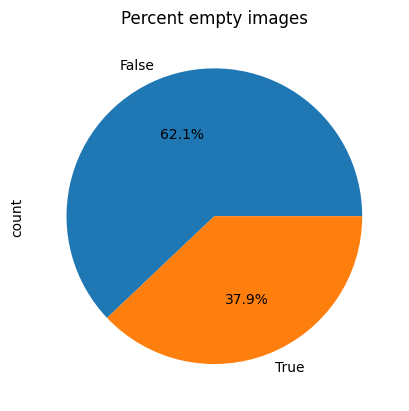

In [3]:
tilling_1.df['is_empty'].value_counts().plot.pie(y='type', autopct='%.1f%%', legend=False)
plt.title('Percent empty images');

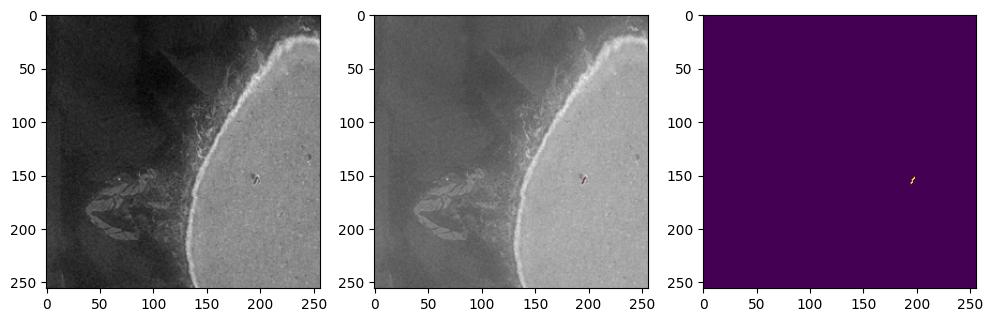

In [4]:
img, mask, bbx, size = tilling_1[54590]



fig, axarr = plt.subplots(ncols=3, figsize=(12, 6))
axarr[0].imshow(torch.permute(img, (1,2,0)).numpy(), cmap="gray")
axarr[1].imshow(color.label2rgb(mask.numpy(), torch.permute(img, (1,2,0)).numpy(), bg_label=0, bg_color=(1.,1.,1.), alpha=0.25))
axarr[2].imshow(mask, vmin=0, interpolation='antialiased', interpolation_stage='rgba')

# Dataset statistic

In [5]:
loader = torch.utils.data.DataLoader(
    tilling_1 ,
    batch_size=5,
    
    shuffle=False,
    pin_memory=True
)

In [6]:
psum = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

num_pixels = 0
pbar = tqdm(enumerate(loader), total=len(loader), desc='Calculate')
for step, batch in pbar:
    images, _, _, _ = batch
    batch_size, num_channels, height, width = images.shape
    num_pixels += batch_size * height * width
    
    psum += images.sum(axis=[0, 2, 3])
    psum_sq += (images**2).sum(axis=[0, 2, 3])

    
# mean and STD
total_mean = psum / num_pixels
total_var = (psum_sq / num_pixels)  - (total_mean ** 2)
total_std = torch.sqrt(total_var)

# output
print("mean: " + str(total_mean))
print("std:  " + str(total_std))


Calculate: 100%|██████████| 10940/10940 [01:43<00:00, 105.55it/s]

mean: tensor([0.2425, 0.2425, 0.2425])
std:  tensor([0.1766, 0.1766, 0.1766])


In [ ]:
img, mask, is_empty, bbx, size = data_loader[8]
augmented = train_transform(image=img,mask=mask)
img,mask = augmented['image'],augmented['mask']


fig, axarr = plt.subplots(ncols=3, figsize=(12, 6))
axarr[0].imshow(torch.permute(img, (1,2,0)).numpy(), cmap="gray")
axarr[1].imshow(color.label2rgb(mask.numpy(), torch.permute(img, (1,2,0)).numpy(), bg_label=0, bg_color=(1.,1.,1.), alpha=0.25))
axarr[2].imshow(mask, vmin=0, interpolation='antialiased', interpolation_stage='rgba')